<h1><center>The Sparks Foundation</center></h1>
<h3>TASK 2 - Prediction using Unsupervised ML</h3>


* In this task, we are going to predict the optimum number of clusters from the given iris dataset and represent it visually. This includes unsupervised learning.

*   Dataset : https://bit.ly/3kXTdox


<h3><b>Author - Chandan Soren </b></h3>






In [ ]:
# Importing all the libraries needed in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

#### Data Exploration

In [ ]:
#Load the iris Dataset
df = datasets.load_iris()
df = pd.DataFrame(df.data, columns = df.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#number of rows and columns
df.shape

(150, 4)

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
# null values at present
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
# To see summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


#### Data visualzation

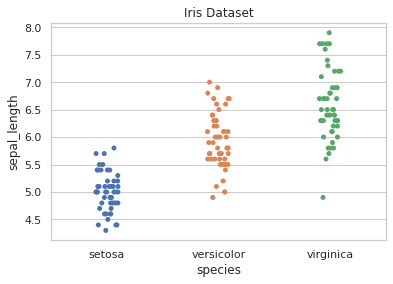

In [ ]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris')
ax = sns.stripplot(x= 'species', y= 'sepal_length', data=iris);
plt.title('Iris Dataset')
plt.show()

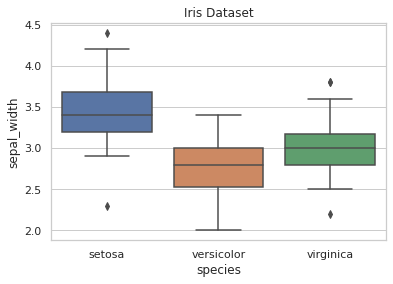

In [ ]:
sns.boxplot(x= 'species', y='sepal_width', data=iris)
plt.title('Iris Dataset')
plt.show()

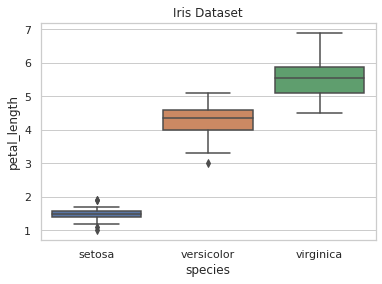

In [ ]:
sns.boxplot(x= 'species', y='petal_length', data=iris)
plt.title('Iris Dataset')
plt.show()

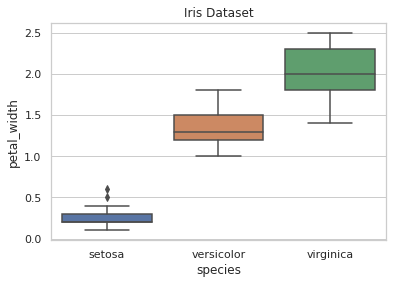

In [ ]:
sns.boxplot(x= 'species', y='petal_width', data=iris)
plt.title('Iris Dataset')
plt.show()

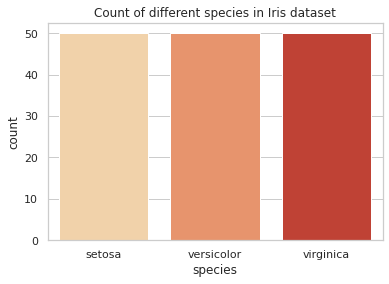

In [ ]:
# Count plot
sns.countplot(x='species', data=iris, palette="OrRd")
plt.title("Count of different species in Iris dataset")
plt.show()

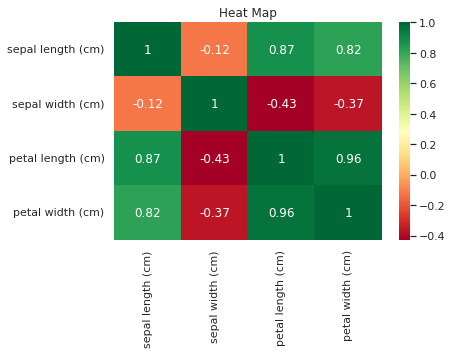

In [ ]:
# This is needed to analysis of two vaiable to determining the empirical relationship between them
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.title("Heat Map")
plt.show()

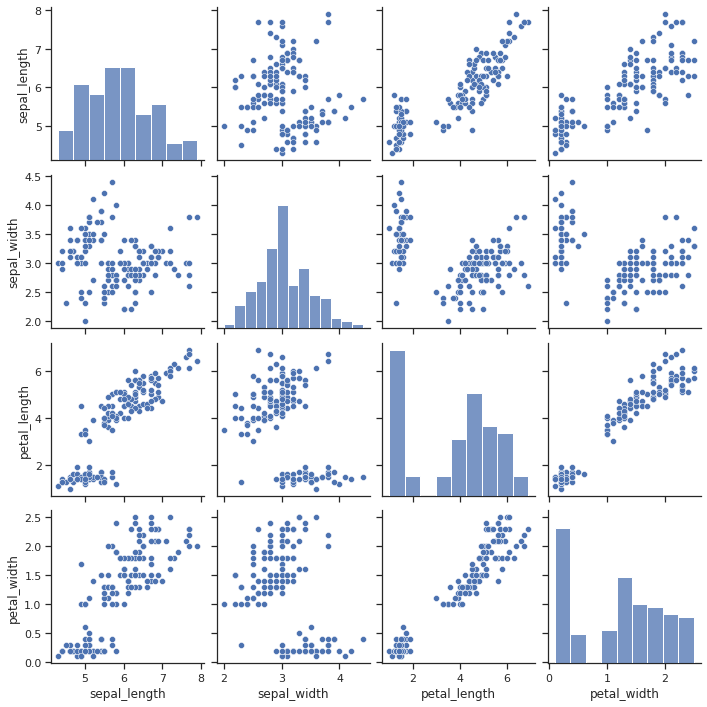

In [ ]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g= sns.pairplot(iris)
plt.show()

#### Optimal numbers of clusters using KMeans clustering 

In [ ]:
# Finding the optimum number of clusters using k-means

X = df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    ## appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_) 
    print('k:',i ,"wcss:",kmeans.inertia_)


k: 1 wcss: 681.3706
k: 2 wcss: 152.3479517603579
k: 3 wcss: 78.851441426146
k: 4 wcss: 57.22847321428572
k: 5 wcss: 46.47223015873017
k: 6 wcss: 39.03998724608726
k: 7 wcss: 34.29971212121213
k: 8 wcss: 30.06311061745273
k: 9 wcss: 28.271721728563833
k: 10 wcss: 26.09432474054042


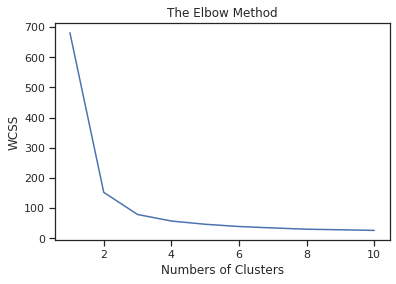

In [ ]:
# Plotting the result into a line graph, allowing us to observe 'the elbow'
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Numbers of Clusters')
plt.ylabel('WCSS')
plt.show()

We can see that after 3 the drop is WCSS is minimal. So we choose 3 as the optimal numbers of clusters.

#### Intializing K-Means with optimal Numbers of clusters 

In [ ]:
# Fitting K-Means to dataset
kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Return a label for each data point based on on the numbers of clusters
y_kmeans = kmeans.fit_predict(X)

#### Predicting Values

In [ ]:
y_kmeans

array([5, 4, 4, 4, 5, 1, 4, 5, 4, 4, 1, 5, 4, 4, 1, 1, 1, 5, 1, 5, 5, 5,
       4, 5, 5, 4, 5, 5, 5, 4, 4, 5, 1, 1, 4, 4, 5, 5, 4, 5, 5, 4, 4, 5,
       5, 4, 5, 4, 5, 5, 8, 8, 8, 6, 8, 6, 8, 3, 8, 6, 3, 6, 6, 8, 6, 8,
       6, 6, 0, 6, 0, 6, 0, 8, 8, 8, 8, 8, 8, 3, 6, 3, 6, 0, 6, 8, 8, 8,
       6, 6, 6, 8, 6, 3, 6, 6, 6, 8, 3, 6, 2, 0, 7, 2, 2, 7, 6, 7, 2, 9,
       2, 0, 2, 0, 0, 2, 2, 9, 7, 0, 2, 0, 7, 0, 2, 7, 0, 0, 2, 7, 7, 9,
       2, 0, 0, 7, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

#### Visualizing the clusters

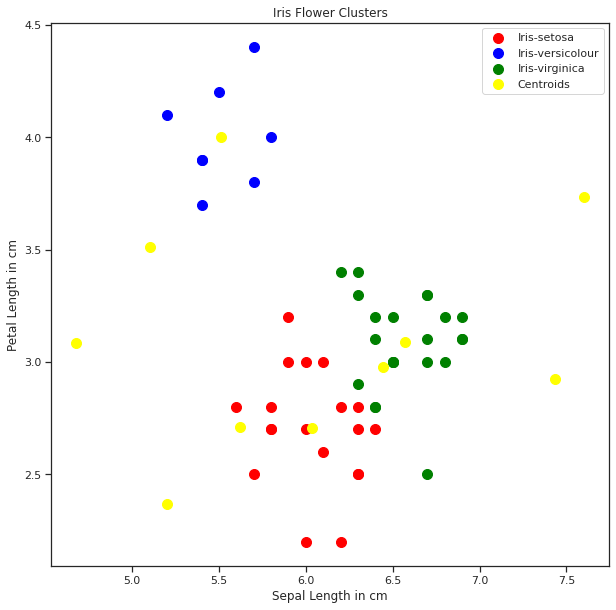

In [ ]:
# Visualising the clusters
plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()